# RNN

## Imports

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import regularizers

## Load

In [2]:
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

category_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df_train['sentiment'] = df_train['sentiment'].replace(category_mapping)
df_test['sentiment'] = df_test['sentiment'].replace(category_mapping)

# Verificar as categorias após a substituição
output_categories = df_train['sentiment'].unique()
print(f"The output categories are: {output_categories}")


# Verificar as categorias após a substituição
output_categories = df_test['sentiment'].unique()
print(f"The output categories are: {output_categories}")


# Preencher valores ausentes com uma string vazia
df_train['lyrics'] = df_train['lyrics'].fillna('')
df_test['lyrics'] = df_test['lyrics'].fillna('')

# Continuar com o código de pré-processamento
X_train = df_train['lyrics'].values
y_train = df_train['sentiment'].values

X_test = df_test['lyrics'].values
y_test = df_test['sentiment'].values

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

Loading data...
The output categories are: [2 0 1]
The output categories are: [0 2 1]
X_train shape: (110847, 500)
y_train shape: (110847,)
X_test shape: (47506, 500)
y_test shape: (47506,)


In [3]:
print("The output categories are", np.unique(y_train))
print("The number of unique words is", len(np.unique(np.hstack(X_test))))

The output categories are [0 1 2]
The number of unique words is 9978


## Define model

In [4]:
num_classes = 3  # Número de classes (positive, negative, neutral)

# Mapear os rótulos de string para valores inteiros
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Converter os rótulos para o formato one-hot
y_train = to_categorical(y_train_encoded, num_classes)
y_test = to_categorical(y_test_encoded, num_classes)


In [4]:
#model = Sequential()
#model.add(Embedding(max_features, 32))
#model.add(SimpleRNN(32))
#model.add(Dense(3, activation='softmax'))
#model.summary()


# Estamos a usar este
#model = Sequential()
#model.add(Embedding(max_features, 32, embeddings_regularizer=regularizers.l2(0.01)))  # Adiciona regularização L2
#model.add(SimpleRNN(32))
#model.add(Dense(3, activation='softmax'))
#model.summary()

In [11]:
from keras.layers import Dropout
from keras import regularizers

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Dropout(0.5))  # Adicionando Dropout com taxa de 0.5
model.add(SimpleRNN(32, kernel_regularizer=regularizers.l2(0.01)))  # Adicionando regularização L2 com taxa de 0.01
model.add(Dense(3, activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 dropout_1 (Dropout)         (None, None, 32)          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 322,179
Trainable params: 322,179
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras import optimizers

optimizer = optimizers.Adam(lr=0.001)  # Definir a taxa de aprendizagem para 0.001
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=12,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/12
693/693 [==============================] - 48s 68ms/step - loss: 1.0999 - acc: 0.4695 - val_loss: 1.0069 - val_acc: 0.5268
Epoch 2/12
693/693 [==============================] - 47s 67ms/step - loss: 0.9978 - acc: 0.5318 - val_loss: 1.0164 - val_acc: 0.5114
Epoch 3/12
693/693 [==============================] - 49s 71ms/step - loss: 0.9775 - acc: 0.5468 - val_loss: 1.0030 - val_acc: 0.5292
Epoch 4/12
693/693 [==============================] - 50s 73ms/step - loss: 0.9570 - acc: 0.5588 - val_loss: 1.0113 - val_acc: 0.5323
Epoch 5/12
693/693 [==============================] - 52s 75ms/step - loss: 0.9359 - acc: 0.5720 - val_loss: 1.0280 - val_acc: 0.5088
Epoch 6/12
693/693 [==============================] - 53s 76ms/step - loss: 0.9079 - acc: 0.5911 - val_loss: 1.0263 - val_acc: 0.5217
Epoch 7/12
693/693 [==============================] - 53s 77ms/step - loss: 0.8849 - acc: 0.6057 - val_loss: 1.0393 - val_acc: 0.5149
Epoch 8/12
693/693 [==============================] - 45s 66ms

In [5]:
from keras.layers import Dropout, LSTM
from keras import regularizers
from tensorflow.keras import optimizers

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Dropout(0.7))
model.add(LSTM(128, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(3, activation='softmax'))
model.summary()

optimizer = optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=12,
                    batch_size=128,
                    validation_split=0.2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 lstm (LSTM)                 (None, 128)               82432     
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 402,819
Trainable params: 402,819
Non-trainable params: 0
_________________________________________________________________


Epoch 1/12
693/693 [==============================] - 289s 415ms/step - loss: 1.0589 - acc: 0.4845 - val_loss: 0.9996 - val_acc: 0.5282
Epoch 2/12
693/693 [==============================] - 247s 357ms/step - loss: 0.9889 - acc: 0.5347 - val_loss: 0.9965 - val_acc: 0.5291
Epoch 3/12
693/693 [==============================] - 247s 356ms/step - loss: 0.9758 - acc: 0.5440 - val_loss: 1.0082 - val_acc: 0.5267
Epoch 4/12
693/693 [==============================] - 259s 373ms/step - loss: 0.9665 - acc: 0.5507 - val_loss: 0.9962 - val_acc: 0.5292
Epoch 5/12
693/693 [==============================] - 271s 391ms/step - loss: 0.9607 - acc: 0.5547 - val_loss: 1.0015 - val_acc: 0.5264
Epoch 6/12
693/693 [==============================] - 271s 391ms/step - loss: 0.9560 - acc: 0.5574 - val_loss: 0.9994 - val_acc: 0.5293
Epoch 7/12
693/693 [==============================] - 267s 385ms/step - loss: 0.9529 - acc: 0.5590 - val_loss: 1.0004 - val_acc: 0.5275
Epoch 8/12
693/693 [============================

In [6]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 55.34%


## Plot

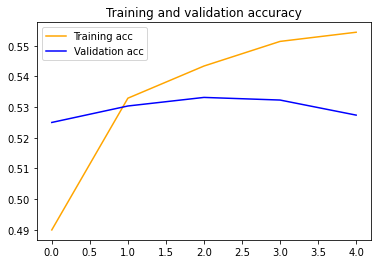

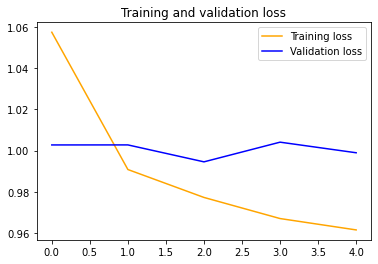

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()